[<img src="https://siliconmisiones.gob.ar/wp-content/uploads/2023/05/cropped-500x500px-logo-silicon.png" alt="Logo Silicon Misiones" width="300"/>](https://siliconmisiones.gob.ar/)

<div class="markdown-google-sans">
  <h1>Python para Ciencia de Datos e Inteligencia Artificial - Proyecto Integrador Nº3</h1>
</div>

# Sobre el Dataset a utilizar

- Este dataset contiene información relacionada con salarios en el ámbito de Data Science a nivel mundial entre 2020 y 2022.
- [`ds_salaries.csv`](https://gist.githubusercontent.com/mzapf/2004abf1a9e38e6951625f3cf055d133/raw/0c6182893c3ae04f2fcb39283723fdf5cfd0ecbd/ds_salaries.csv) fue generado por [Ruchi Bhatia](https://ruchisbhatia.com/) con datos de [ai-jobs.net](https://ai-jobs.net/).

## Descripción de cada columna

| Columna             | Descripción                                                                                                        |
|--------------------|--------------------------------------------------------------------------------------------------------------------|
| work_year          | El año en que se pagó el salario.                                                                                  |
| experience_level   | El nivel de experiencia en el trabajo durante el año con los siguientes valores posibles: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | El tipo de empleo para el rol: PT Part-time FT Full-time CT Contract FL Freelance                                   |
| job_title          | El puesto desempeñado durante el año.                                                                              |
| salary             | El monto total del salario bruto pagado.                                                                           |
| salary_currency    | La moneda en la que se pagó el salario según el código ISO 4217.                                                   |
| salary_in_usd      | El salario en USD (tasa de cambio promedio dividida por la tasa USD del año respectivo, según fxdata.foorilla.com). |
| employee_residence | El país de residencia principal del empleado durante el año laboral, según el código de país ISO 3166.              |
| remote_ratio       | La cantidad total de trabajo realizado de forma remota, los valores posibles son: 0 Sin trabajo remoto (menos del 20%) 50 Parcialmente remoto 100 Completamente remoto (más del 80%) |
| company_location   | El país de la oficina principal o sucursal contratante del empleador, según el código de país ISO 3166.             |
| company_size       | El número promedio de empleados que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeña) M 50 a 250 empleados (mediana) L más de 250 empleados (grande) |


# Análisis Exploratorio de Datos

## Importación del dataset y módulos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

dataset_url = "https://gist.githubusercontent.com/mzapf/2004abf1a9e38e6951625f3cf055d133/raw/0c6182893c3ae04f2fcb39283723fdf5cfd0ecbd/ds_salaries.csv"

# Importación del dataset con pandas
data = pd.read_csv(dataset_url)

# Si trabajamos con el objeto EDA (POO) de la Clase 24;
# data = EDA(dataset_url, 'csv')
# data.df retorna el DataFrame

## Paso a paso del Análisis Exploratorio de Datos

### 1. Conociendo la estructura inicial del dataset

Antes de comenzar a analizar en profundidad los datos, es importante entender cuántas observaciones (filas) y variables (columnas) tenemos.

In [4]:

print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")


Filas: 607, Columnas: 11


### 2. Explorando los tipos de datos

Conocer los tipos de datos de cada columna nos permitirá entender mejor cómo están estructurados los datos, lo cual es crucial para decidir cómo manipularlos y analizarlos más adelante.

In [10]:
def show_column_types(df):
    """
    Muestra los nombres de las columnas y sus tipos de datos.

    :param df: DataFrame con los datos.
    """
    if df is not None:
        print("Tipos de datos de las columnas:")
        display(df.dtypes)
    else:
        print("El DataFrame no está disponible.")

In [11]:
show_column_types(data)

Tipos de datos de las columnas:


,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


### 3. Explorando las primeras y últimas filas del dataset

Para tener una idea inicial del contenido del dataset, es útil que observemos las primeras y últimas filas. Esto nos dará una visión general de cómo están organizados los datos y qué tipo de información contienen.

In [12]:
def show_first_last_rows(df, n=5):
    """
    Muestra las primeras y últimas n filas del DataFrame.

    :param df: DataFrame con los datos.
    :param n: Número de filas a mostrar (por defecto 5).
    """
    if df is not None:
        print(f"Primeras {n} filas del dataset:")
        display(df.head(n))
        print(f"Últimas {n} filas del dataset:")
        display(df.tail(n))
    else:
        print("El DataFrame no está disponible.")

In [13]:
show_first_last_rows(data, n=2)

Primeras 2 filas del dataset:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Últimas 2 filas del dataset:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### 4. Identificando los valores nulos

Es fundamental que identifiquemos si hay valores faltantes en nuestro dataset, ya que estos pueden influir en el análisis posterior. Detectar los valores nulos nos dará una idea de las columnas que requieren atención o tratamiento especial antes de proceder con el análisis.

In [8]:
def identify_missing_values(df):

    if df is not None:
        total_missing = df.isnull().sum()
        percent_missing = (total_missing / df.shape[0]) * 100
        missing_data = pd.DataFrame({'Total Nulos': total_missing, 'Porcentaje Nulos': percent_missing})
        missing_columns = missing_data[missing_data['Total Nulos'] > 0]
        if missing_columns.empty:
            print("No hay valores nulos en el dataset.")
        else:
            print("Valores nulos por columna:")
            display(missing_columns)
    else:
        print("El DataFrame no está disponible.")

In [9]:
identify_missing_values(data)

No hay valores nulos en el dataset.


### 5. Detectando filas duplicadas

Es importante que revisemos si nuestro dataset contiene filas duplicadas, ya que pueden distorsionar los resultados del análisis. Identificar estos duplicados nos permitirá limpiarlos para asegurar que los datos sean precisos y confiables.

In [14]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
602,False
603,False
604,False
605,False


### 6. Calculando estadísticas básicas

Obtener un resumen de las estadísticas descriptivas nos permitirá entender mejor las características principales de las variables numéricas y categóricas del dataset. Esto nos dará una visión general sobre la distribución, los promedios, las desviaciones y otros aspectos importantes de los datos.

In [15]:
def calculate_basic_statistics(df):
    """
    Muestra estadísticas descriptivas de las columnas numéricas y un resumen básico de las variables categóricas.

    :param df: DataFrame con los datos.
    """

    if df is not None:
        print("Estadísticas descriptivas de variables numéricas:")
        n_summary = df.describe(include=[np.number])
        display(n_summary)

        print("Resumen básico de variables categóricas:")
        c_summary = df.describe(include=['object', 'category'])
        display(c_summary)

        print("Moda de las variables categóricas:")
        m_summary = df.select_dtypes(include=['object', 'category']).mode().iloc[0]
        display(m_summary)
    else:
        print("El DataFrame no está disponible.")

In [16]:
calculate_basic_statistics(data)

Estadísticas descriptivas de variables numéricas:


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


Resumen básico de variables categóricas:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


Moda de las variables categóricas:


,0
experience_level,SE
employment_type,FT
job_title,Data Scientist
salary_currency,USD
employee_residence,US
company_location,US
company_size,M


### 7. Resumen de valores únicos

Es útil que revisemos cuántos valores únicos existen en cada columna del dataset. Esto nos ayudará a entender la diversidad de los datos, especialmente en las columnas categóricas, y a identificar posibles oportunidades para segmentar o analizar los datos en mayor profundidad.

In [17]:
def unique_values_summary(df):
    """
    Muestra el número de valores únicos por columna.

    :param df: DataFrame con los datos.
    """
    if df is not None:
        print("Valores únicos por columna:")
        for column in df.columns:
            num_unique = df[column].nunique()
            print(f"{column}: {num_unique} valores únicos")
    else:
        print("El DataFrame no está disponible.")

In [18]:
unique_values_summary(data)

Valores únicos por columna:
work_year: 3 valores únicos
experience_level: 4 valores únicos
employment_type: 4 valores únicos
job_title: 50 valores únicos
salary: 272 valores únicos
salary_currency: 17 valores únicos
salary_in_usd: 369 valores únicos
employee_residence: 57 valores únicos
remote_ratio: 3 valores únicos
company_location: 50 valores únicos
company_size: 3 valores únicos


### 8. Visualizando la matriz de correlación

Para comprender mejor las relaciones entre las variables numéricas, es útil que generemos una matriz de correlación. Esto nos permitirá identificar posibles patrones o relaciones entre las variables, lo cual es crucial para análisis más profundos y para la construcción de modelos predictivos.

In [21]:
def plot_correlation_matrix(df):
    """
    Muestra la matriz de correlación de las variables numéricas.

    :param df: DataFrame con los datos.
    """
    if df is not None:
        n_columns = df.select_dtypes(include=[np.number]).columns
        if len(n_columns) > 1:
            corr_matrix = df[n_columns].corr()
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
            plt.title('Matriz de correlación')
            plt.show()
        else:
            print("No hay columnas numéricas para visualizar.")
    else:
        print("El DataFrame no está disponible.")

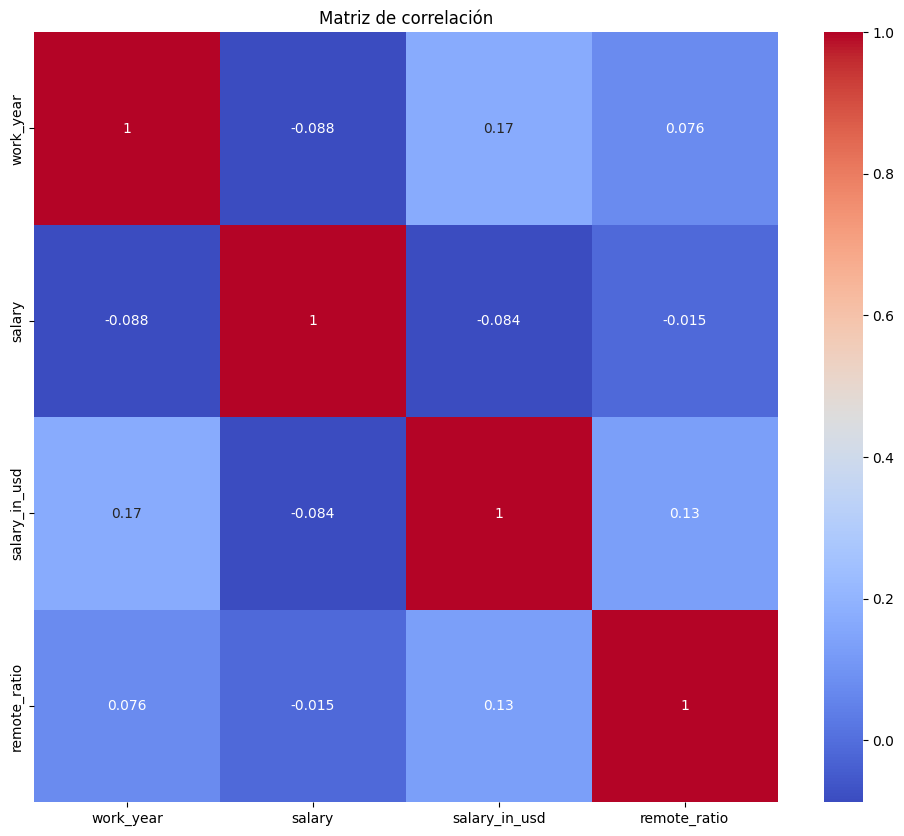

In [22]:
plot_correlation_matrix(data)

### 9. Analizando la distribución por año

Vamos a revisar cuántas observaciones tenemos para cada año en la variable `work_year` del dataset. Esto nos permitirá entender mejor la distribución temporal de los datos.

In [23]:
def analyze_distribution_by_year(df):

    if df is not None:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='work_year')
        plt.title("Distribución de observaciones por año")
        plt.xlabel("Año")
        plt.ylabel("Cantidad de observaciones")
        plt.show()
    else:
        print("El DataFrame no está disponible.")




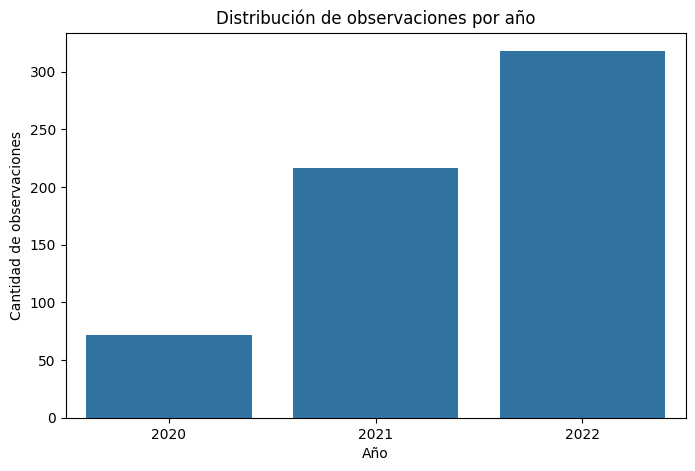

In [24]:
analyze_distribution_by_year(data)

### 10. Analizando la distribución del trabajo remoto

Revisemos la cantidad de observaciones para cada nivel de `remote_ratio` en el dataset. Esto nos ayudará a entender la frecuencia de trabajo presencial, híbrido y remoto.

In [25]:
def analyze_remote_work_distribution(df):

    if df is not None:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='remote_ratio')
        plt.title("Distribución del trabajo remoto")
        plt.xlabel("Ratio de trabajo remoto")
        plt.ylabel("Cantidad de observaciones")
        plt.xticks(ticks=[0, 1, 2], labels=['On-site', 'Parcialmente remoto', 'Completamente remoto'])
        plt.show()
    else:
        print("El DataFrame no está disponible.")




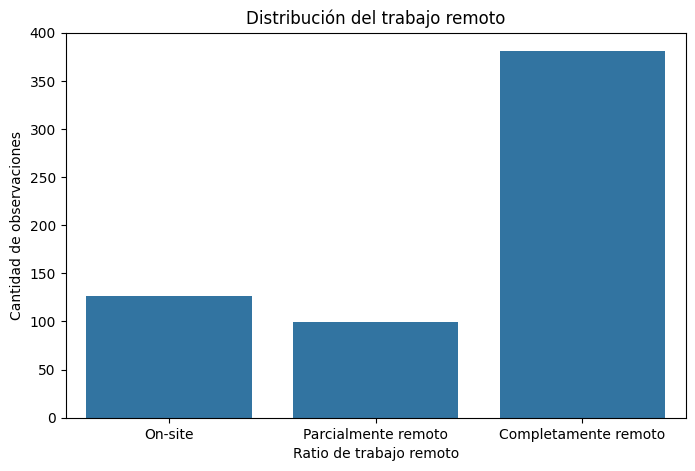

In [26]:
analyze_remote_work_distribution(data)

### 11. Los 10 roles más populares en la ciencia de datos

Vamos a visualizar los 10 roles más frecuentes en la variable `job_title` del dataset. Esto nos permitirá identificar cuáles son los roles más comunes en el ámbito de la ciencia de datos.

In [27]:
def analyze_top_job_titles(df):

    if df is not None:
        top_jobs = df['job_title'].value_counts().head(10)
        plt.figure(figsize=(10, 6))
        top_jobs.plot(kind='bar', color='skyblue')
        plt.title("Los 10 roles más populares en Ciencia de Datos")
        plt.xlabel("Rol")
        plt.ylabel("Cantidad de empleos")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("El DataFrame no está disponible.")




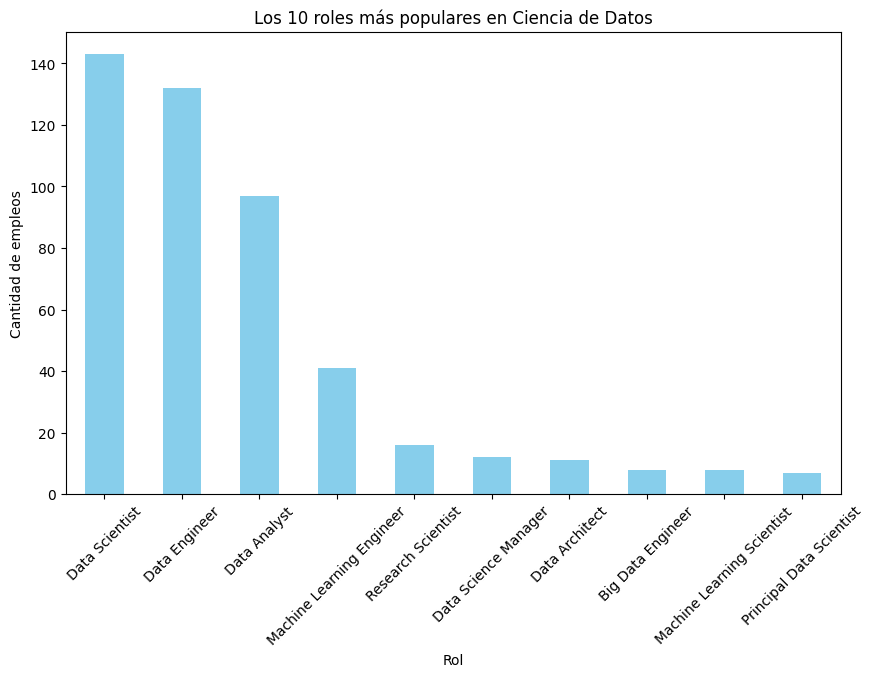

In [28]:
analyze_top_job_titles(data)

### 12. Los 10 roles mejor pagados en ciencia de datos

Vamos a visualizar los 10 roles mejor pagados en la variable `job_title` del dataset, basándonos en la columna de `salary_in_usd`. Esto nos permitirá identificar los puestos con los salarios más altos en el ámbito de la ciencia de datos.

In [29]:
def analyze_top_paid_jobs(df):

    if df is not None:
        top_paid_jobs = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
        plt.figure(figsize=(10, 6))
        top_paid_jobs.plot(kind='bar', color='lightgreen')
        plt.title("Los 10 roles mejor pagados en Ciencia de Datos")
        plt.xlabel("Rol")
        plt.ylabel("Salario promedio en USD")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("El DataFrame no está disponible.")




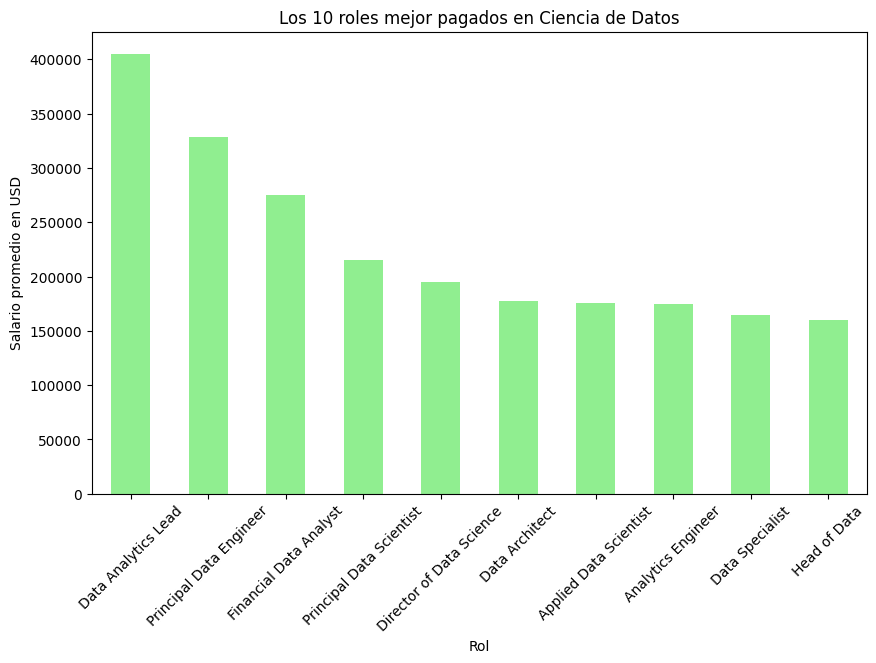

In [30]:
analyze_top_paid_jobs(data)



### 13. Los 10 roles más importantes en ciencia de datos según el salario promedio

Vamos a calcular y visualizar los 10 roles en ciencia de datos con el salario promedio más alto, basándonos en la variable `job_title` y `salary_in_usd`. Esto nos permitirá identificar los puestos más valorados económicamente en el campo de la ciencia de datos.

In [31]:
def analyze_top_average_salary_jobs(df):

    if df is not None:
        average_salary_jobs = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
        plt.figure(figsize=(10, 6))
        average_salary_jobs.plot(kind='bar', color='orange')
        plt.title("Los 10 roles con el salario promedio más alto")
        plt.xlabel("Rol")
        plt.ylabel("Salario promedio en USD")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("El DataFrame no está disponible.")




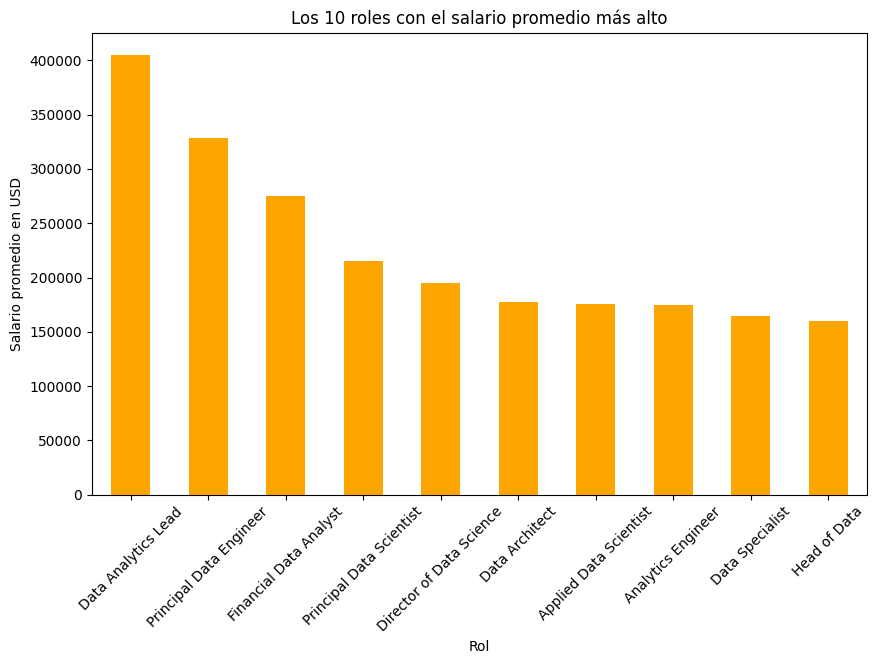

In [32]:
analyze_top_average_salary_jobs(data)

### 14. Total de empleos según nivel de experiencia

Vamos a visualizar la distribución del total de empleos para cada nivel de experiencia, utilizando la variable `experience_level` del dataset. De esta forma, podremos identificar cómo se distribuyen los puestos de trabajo entre los diferentes niveles de experiencia.

In [33]:
def analyze_experience_level_distribution(df):

    if df is not None:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='experience_level')
        plt.title("Distribución de empleos por nivel de experiencia")
        plt.xlabel("Nivel de experiencia")
        plt.ylabel("Cantidad de empleos")
        plt.show()
    else:
        print("El DataFrame no está disponible.")




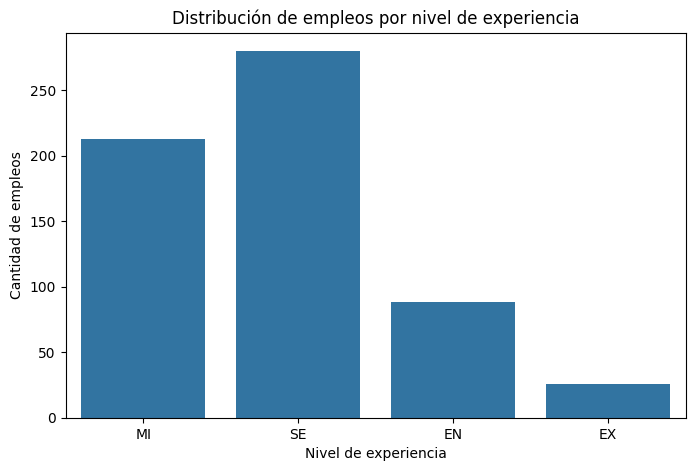

In [34]:
analyze_experience_level_distribution(data)

### 15. Porcentaje de trabajos on-site, híbridos y remotos

Vamos a visualizar el porcentaje de trabajos que son on-site, híbridos y remotos, utilizando la variable `remote_ratio` del dataset. Esto nos ayudará a comprender mejor la distribución de las modalidades de trabajo en el campo de la ciencia de datos.

In [35]:
def analyze_remote_work_percentage(df):

    if df is not None:
        remote_counts = df['remote_ratio'].value_counts(normalize=True) * 100
        remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
        plt.title("Porcentaje de trabajos según modalidad")
        plt.ylabel("")  # Quitar etiqueta del eje y
        plt.show()
    else:
        print("El DataFrame no está disponible.")




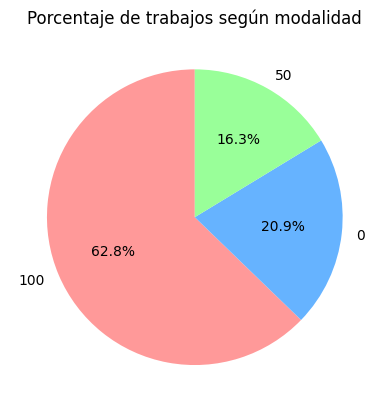

In [36]:
analyze_remote_work_percentage(data)

### 16. Gráfico KDE de la distribución de los salarios en USD

Vamos a crear un gráfico KDE para visualizar la distribución de los salarios en USD, utilizando la variable `salary_in_usd` del dataset. Este gráfico nos permitirá observar la densidad de los salarios y cómo se distribuyen dentro del dataset.

In [37]:
def plot_salary_distribution_kde(df):

    if df is not None:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df['salary_in_usd'], fill=True, color='purple')
        plt.title("Distribución de salarios en USD")
        plt.xlabel("Salario en USD")
        plt.ylabel("Densidad")
        plt.show()
    else:
        print("El DataFrame no está disponible.")




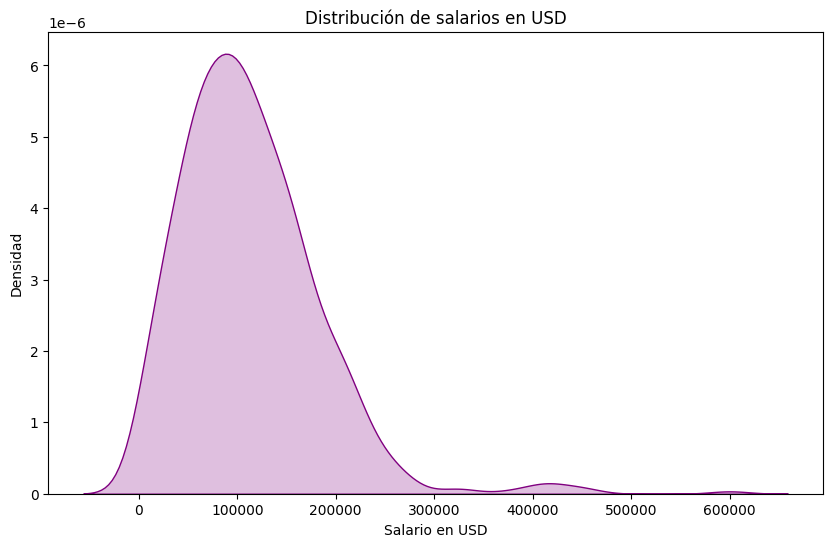

In [38]:
plot_salary_distribution_kde(data)

### 17. Boxplot según nivel de experiencia y salario en USD

Vamos a crear un boxplot para comparar la distribución de los salarios en USD según el nivel de experiencia, utilizando las variables `experience_level` y `salary_in_usd` del dataset. Este gráfico nos ayudará a visualizar la variabilidad de los salarios en cada nivel de experiencia, así como identificar posibles valores atípicos.

In [39]:
def plot_salary_boxplot_by_experience(df):

    if df is not None:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
        plt.title("Boxplot de salarios según nivel de experiencia")
        plt.xlabel("Nivel de experiencia")
        plt.ylabel("Salario en USD")
        plt.show()
    else:
        print("El DataFrame no está disponible.")




/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


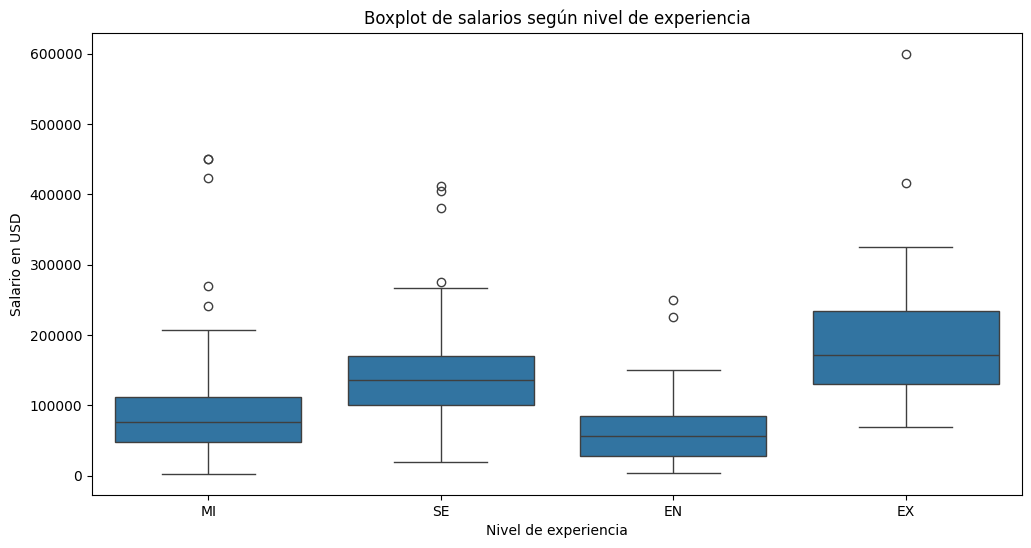

In [40]:
plot_salary_boxplot_by_experience(data)

## Conclusión

A lo largo de esta exploración del dataset de salarios en Ciencia de Datos, hemos obtenido una visión detallada de varios aspectos clave. Comenzamos por comprender la estructura del dataset y el tipo de información que contiene. A partir de ahí, analizamos la distribución de los datos a través de los años, el trabajo remoto y los diferentes niveles de experiencia.

También identificamos los roles más comunes y mejor pagados, así como las diferencias salariales en función de la experiencia. Los gráficos de densidad y boxplots nos permitieron visualizar cómo se distribuyen los salarios y detectar variabilidad entre los diferentes roles.

Finalmente, estos análisis nos proporcionaron un panorama claro del mercado laboral en ciencia de datos, destacando las tendencias salariales, la importancia de los roles y las modalidades de trabajo.